In [1]:
import gdown

import numpy as np
import pandas as pd

from pathlib import Path

In [2]:
data_path = Path("../data/")
github_downloader_path = Path("../dependency_repos/github-downloader/")

gdown.cached_download(
    "https://drive.google.com/uc?id=1T-eBxIZ4S8n6UiI8jdzpsmpk9KgZt793",
    str(data_path/"repo_infos.csv"),
)

File exists: ../data/repo_infos.csv


'../data/repo_infos.csv'

In [3]:
our_repos = pd.read_csv(data_path/"repo_infos.csv", parse_dates=True)
eleuther_repos = pd.read_csv(
    github_downloader_path/"github_repositories.csv", names=["name", "stargazers", "languages"],
)

/home/nathan/nathan_venv/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
our_repos.license.unique()

array(['GNU General Public License v3.0', 'Other',
       'GNU General Public License v2.0', 'MIT License', 'The Unlicense',
       'GNU Lesser General Public License v3.0', 'Apache License 2.0',
       'BSD 2-Clause Simplified License',
       'BSD 3-Clause New or Revised License',
       'GNU Lesser General Public License v2.1',
       'Open Software License 3.0',
       'Do What The F*ck You Want To Public License',
       'Microsoft Public License', 'zlib License',
       'GNU Affero General Public License v3.0',
       'Mozilla Public License 2.0',
       'Creative Commons Attribution Share Alike 4.0 International',
       'Boost Software License 1.0', 'European Union Public License 1.2',
       'ISC License', 'Creative Commons Zero v1.0 Universal',
       'Eclipse Public License 2.0', 'Eclipse Public License 1.0',
       'Creative Commons Attribution 4.0 International',
       'PostgreSQL License', 'BSD Zero Clause License',
       'Microsoft Reciprocal License', 'BSD 3-Clause Cl

/home/nathan/nathan_venv/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


<AxesSubplot:>

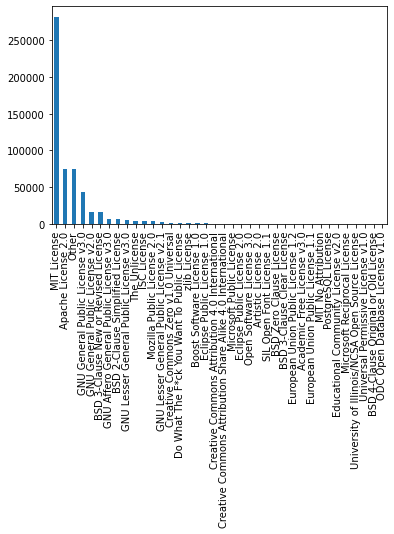

In [5]:
our_repos = pd.read_csv(data_path/"repo_infos.csv", parse_dates=True)

# display bar chart of the most popular licenses
our_repos.license.value_counts().plot(kind="bar")

In [17]:
our_repos = pd.read_csv(data_path/"repo_infos.csv", parse_dates=True)

# number of our repos with an MIT or Apache license
mit_apache_repos = our_repos[(our_repos.license == "MIT License") | (our_repos.license == "Apache License 2.0")]

In [19]:
np.percentile(mit_apache_repos["size"].values, [90, 95, 99])

array([ 19163.2 ,  48317.6 , 218033.08])

In [20]:
len(mit_apache_repos), len(mit_apache_repos[mit_apache_repos["size"] < 48317.6])

(357429, 339557)

In [21]:
mit_apache_repos_filtered = mit_apache_repos[mit_apache_repos["size"] < 48317.6]

In [18]:
np.percentile(our_repos["size"].values, [90, 95, 99])

array([ 19163.2 ,  48317.6 , 218033.08])

In [22]:
len(our_repos), len(our_repos[our_repos["size"] < 70708])

(544340, 517122)

In [23]:
our_filtered_repos = our_repos[our_repos["size"] < 70708]

In [22]:
# Combine our repos and EleutherAI's repos
def combine_repos(ours, eleuthers):
    # Combine our repos
    combined = pd.concat(
        [ours, eleuthers],
    )

    # Remove duplicate repos
    dedup_combined = combined[~combined["name"].duplicated(keep="last")]
    return dedup_combined

# combined = combine_repos(our_filtered_repos, eleuther_repos)
# len(combined)

In [ ]:
mit_apache_combined = combine_repos

In [25]:
combined.to_csv(data_path/"combined_repos_size_filtered.csv", index=False)

In [7]:
combined = pd.read_csv(data_path/"combined_repos_size_filtered.csv")

/home/nathan/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (1,3,4,6,7,12,13,14,15,16,17,18,19,20,21,22,23,24,26) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Shard the dataset into manageable pieces since EleutherAI's downloader has a memory leak.

In [42]:
N_SHARDS = 24

shards = np.array_split(combined, N_SHARDS)
lens = list(map(len, shards))
assert sum(lens) == len(combined)

In [44]:
for idx, shard in enumerate(shards):
    shard.to_csv(data_path/f"shards/combined_repos_shard_{idx}", index=False)

In [45]:
combined.head()

,name,fork project,commits,branches,default branch,releases,contributors,license,watchers,stargazers,...,total issues,open issues,total pull requests,open pull requests,last commit,last commit SHA,has wiki,is archived,languages,labels
0,0-1-0/lightblue-0.4,False,8.0,1,master,0.0,4,GNU General Public License v3.0,14.0,86,...,9,8,5,0,2020-10-18 21:26:07.0,9a4f7b37e923b262d2a29894676ff8ed8cde6237,True,False,NaN,NaN
1,0-14n/ndroid,False,131.0,1,master,0.0,2,Other,5.0,50,...,1,1,2,1,2015-03-17 13:10:07.0,4e5dbe69855a7fda8b74e61d9db5aa61e6ba9ee8,True,False,"C,C++,Objective-C,Shell,Assembly,Haxe,Groff,Py...","bug,duplicate,enhancement,help wanted,invalid,..."
3,0-sec/zero-crack,False,4.0,1,main,1.0,1,GNU General Public License v3.0,0.0,62,...,0,0,0,0,2021-05-12 02:03:08.0,70ee16550a81b396333565515723d5abab87c719,True,False,Python,"bug,documentation,duplicate,enhancement,good f..."
4,0-tikaro/minimum-viable-startpage,False,15.0,1,master,0.0,?,MIT License,4.0,56,...,0,0,2,1,2019-04-21 09:11:12.0,a4fb4aea4474d635c4e4738f7d8c1a485d5d74c8,True,False,"JavaScript,CSS,HTML","bug,duplicate,enhancement,good first issue,hel..."
5,0-u-0/dugon-media-server,False,52.0,1,master,5.0,?,MIT License,2.0,14,...,5,1,0,0,2020-05-16 04:11:45.0,1d6bb1c589e51d2c34b11be20d34dae4bb0c7779,True,False,"JavaScript,Dockerfile","bug,documentation,duplicate,enhancement,featur..."


In [5]:
def convert_to_gh_downloader(df, path):
    # select only name, stargazers, and languages columns and save to path
    df = df[['name', 'stargazers', 'languages']]
    df.to_csv(path/"combined_github_repositories.csv", index=False, header=False)

convert_to_gh_downloader(combined.head(200_000), github_downloader_path)

Once you've converted the combined data to the proper format, change directory to the `github-downloader` repository, install the requirements `pip install python-magic fire tqdm requests lm-dataformat` (the `requirements.txt` doesn't work) and decompression tool `sudo apt install zstd`, edit the file `download_repo_text.py` so that it reads the file `combined_github_repositories.csv` rather than `github_repositories.csv`, and run that file. This will generate a bunch of `json.zst` files containing the text of all the files in the repositories and their metadata (the repo and file it came from). Next decompress the files `zstd -d <file_path>` so that you can read them using pandas.

In [44]:
text_df = pd.read_json(github_downloader_path/"github_data/data_0_time1625430673_default.jsonl", orient="records",lines=True)

In [45]:
text_df.head()

,text,meta
0,"{\n ""name"": ""dugon-media-server"",\n ""version...","{'repo_name': '0-u-0/dugon-media-server', 'sta..."
1,\nconst DEFAULT_CONFIG_PATH = './config';\ncon...,"{'repo_name': '0-u-0/dugon-media-server', 'sta..."
2,"module.exports = {\n debug: true,\n id: ""foo...","{'repo_name': '0-u-0/dugon-media-server', 'sta..."
3,# Dugon Signal Server (Javascript)\n\n[![GitHu...,"{'repo_name': '0-u-0/dugon-media-server', 'sta..."
4,FROM node:carbon\n\nRUN \\n\tset -x \\n\t&& ap...,"{'repo_name': '0-u-0/dugon-media-server', 'sta..."


In [ ]:
print(text_df.text.values[100])

In [49]:
len(text_df)

2045

In [3]:
from subprocess import CalledProcessError, check_output

scorecard_path = Path("../scripts/scorecard")

try:
    results = check_output(
        [
            scorecard_path,
            f"--repo=github.com/kubernetes/kubernetes",
            "--checks=Vulnerabilities",
            "--format=csv",
        ]
    ).decode("utf-8")
except CalledProcessError as e:
    # Exception thrown when the method is malformed, i.e, it is missing a curly brace
    error = e.output.decode("utf-8")

{"level":"warn","ts":1625538732.958198,"caller":"roundtripper/rate_limit.go:58","msg":"Rate limit exceeded. Waiting 49m9.041814722s to retry..."}


KeyboardInterrupt: 